In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#Dataset
fashionMNIST = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashionMNIST.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

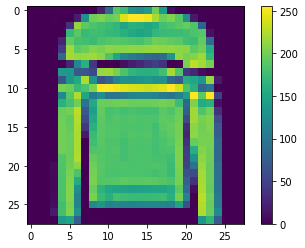

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.show()

In [ ]:
#Data Preprocessing
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
#Bulding Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   #Input Layer(1)
    keras.layers.Dense(128, activation='relu'),  #Hidden Layer(2),  relu--> Rectify Linear Unit
    keras.layers.Dense(10, activation='softmax') #Output Layer(3)
])


In [ ]:
#Compiling Model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4955 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3746 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3119 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2916 - accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2638 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2444 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [ ]:
#Evaluating Model
test_lost, test_acc = model.evaluate(test_images, test_labels, verbose =1)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8765
Test Accuracy: 0.8765000104904175


In [ ]:
#Prediction
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[0]

array([2.4599516e-09, 5.8079197e-10, 4.2176496e-10, 2.1439927e-12,
       5.6221115e-11, 1.1705527e-04, 9.2379766e-09, 2.6552044e-02,
       1.0116675e-08, 9.7333086e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
print(class_names[np.argmax(predictions[2])])

Trouser


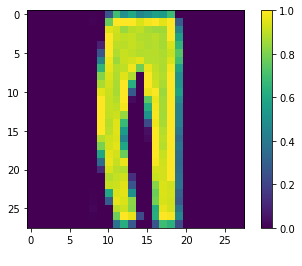

In [ ]:
plt.figure()
plt.imshow(test_images[2])
plt.xlabel('T')
plt.colorbar()
plt.show()

Pick any number: 34
1/1 [==============================] - 0s 13ms/step
Expected Class: Ankle boot	Predicted Class: Ankle boot


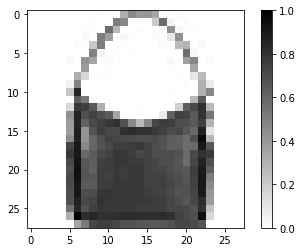

In [ ]:
#Verifing Prediction

COLOR= 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat'
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  print('Expected Class:',  class_names[correct_label] + '\tPredicted Class:', predicted_class)
  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def getNumber():
  while True:
    num = input("Pick any number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("Try again...")

num = getNumber()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)